In [1]:
#!pip install natsort
#!pip install seaborn
#!pip install glob2
#!pip install xarray

In [2]:
import pandas as pd
%pylab inline
import seaborn as sns
import glob2
#Trying to work out a safety for natsort
from types import ModuleType
from natsort import natsort as ns
if isinstance(ns, ModuleType):
    natsort = ns.natsorted
else:
    nasort = ns

Populating the interactive namespace from numpy and matplotlib


In [3]:
ls

Untitled.ipynb  pandas_analysis-Copy1.ipynb


## A

In [4]:
#rdir = '/workspace'
rdir = '../'

dat_files = natsort(glob2.glob(rdir + '/results/A/**/*.dat'))


len(dat_files)
#dat_files

7

In [5]:
columns2 = ['areaintRock', 'tempintRock', 'rmsintRock', 'dwintRock', 'vdintRock', 
            'areaintLith', 'tempintLith','rmsintLith', 'dwintLith', 'vdintLith',
            'areaintLower', 'tempintLower', 'rmsintLower', 'dwintLower', 'vdintLower', 
            'areaintHinge180', 'vdintHinge180', 'areaintHinge60', 'vdintHinge60', 
            'areaintInterface', 'vdintInterface', 'vdintInterface0',
            'rmsSurf', 'nuTop', 'nuBottom', 'plateness', 'subzone',
            'lRidge', 'rRidge', 'realtime']

In [6]:
columns3 = ['areaintRock', 'tempintRock', 'rmsintRock', 'dwintRock', 'vdintRock', 
            'areaintLith', 'tempintLith','rmsintLith', 'dwintLith', 'vdintLith',
            'areaintLower', 'tempintLower', 'rmsintLower', 'dwintLower', 'vdintLower', 
            'areaintHinge180', 'vdintHinge180', 'areaintHinge60', 'vdintHinge60', 
            'areaintInterface', 'vdintInterface', 'vdintInterface0',
            
            'minVel','maxVel', 'minVxsurf', 'maxVxsurf', 'surfLength', 
            'rmsSurf', 'nuTop', 'nuBottom', 'plateness', 'subzone',
            'lRidge', 'rRidge', 'realtime']


In [11]:
dat_files

['..//results/A/1/results_modelA_1.dat',
 '..//results/A/2/results_modelA_2.dat',
 '..//results/A/3/results_modelA_3.dat',
 '..//results/A/4/results_modelA_4.dat',
 '..//results/A/5/results_modelA_5.dat',
 '..//results/A/7/results_modelA_7.dat',
 '..//results/A/8/results_modelA_8.dat']

In [12]:
#df = pd.read_csv(dat_files[0], sep="\s*", header=None,  index_col=False)
#df.columns = columns3 
#df

In [13]:
data = []
realtime = []
gooddata = []
area = []
col = 'rmsSurfScaled'

for i in dat_files[:-1]:
    print(i)
    
    try:
        df = pd.read_csv(i, sep="\s*", header=None,  index_col=False)
        df.columns = columns2 
        df['rmsSurfScaled'] = (df['rmsSurf']/(2900.*1e3/1e-6))*(1e2*3600*24*365)
        df['realtimeScaled'] = (df['realtime']*((2900.*1e3)**2/1e-6))/(1e6*3600*24*365)
        realtime.append(df['realtimeScaled'])
        area.append(df['areaintRock'])
        data.append(df[col])
        gooddata.append(i)
        #print(i)
    except:
        pass
    #    data.append(['NaN']*30)
    #pd.concat(newdf, df.mean())
    #print(df.mean())
    #newdf.loc[i] = df.max()

data = np.array(data)
realtime = np.array(realtime)

..//results/A/1/results_modelA_1.dat
..//results/A/2/results_modelA_2.dat
..//results/A/3/results_modelA_3.dat
..//results/A/4/results_modelA_4.dat
..//results/A/5/results_modelA_5.dat
..//results/A/7/results_modelA_7.dat


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


In [14]:
#data

In [29]:



columns3 = ['areaintRock', 'tempintRock', 'rmsintRock', 'dwintRock', 'vdintRock', 
            'areaintLith', 'tempintLith','rmsintLith', 'dwintLith', 'vdintLith',
            'areaintLower', 'tempintLower', 'rmsintLower', 'dwintLower', 'vdintLower', 
            'areaintHinge180', 'vdintHinge180', 'areaintHinge60', 'vdintHinge60', 
            'areaintInterface', 'vdintInterface', 'vdintInterface0',
            
            'minVel','maxVel', 'minVxsurf', 'maxVxsurf', 'surfLength', 
            'rmsSurf', 'nuTop', 'nuBottom', 'plateness', 'subzone',
            'lRidge', 'rRidge', 'realtime']

#df = pd.read_csv(dat_files[4], sep="\s*", header=None,  index_col=False)
df = pd.read_csv('../results/A/8/results_modelA_8.dat', sep="\s*", header=None,  index_col=False)

df.columns = columns3

df['rmsSurfScaled'] = (df['rmsSurf']/(2900.*1e3/1e-6))*(1e2*3600*24*365)
df['realtimeScaled'] = (df['realtime']*((2900.*1e3)**2/1e-6))/(1e6*3600*24*365)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:15: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


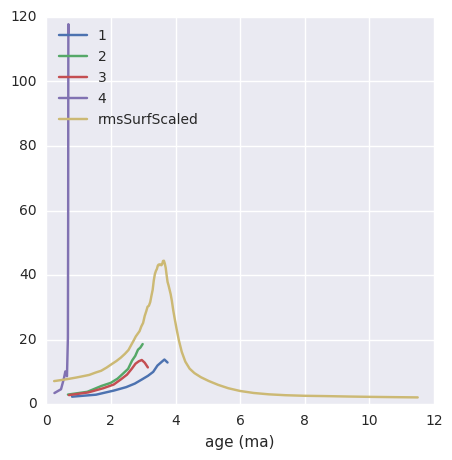

In [30]:

fig, ax = plt.subplots(figsize=(5,5))

for i in range(0, realtime.shape[0]):
    #c = inv_map[params[i][1]]
    #if params[i][1] >= 1.:
    ax.plot(realtime[i], data[i]/3.4,label=(str(i+1)) )

plt.plot(df['realtimeScaled'] , df['rmsSurfScaled'] )
    
#ax.set_xlim(1., 200.)
#ax.set_ylim(-0.7, 0.7)
ax.legend(loc=2)
#ax.set_title('hmm')
#ax.set_ylabel('RMS surface velocity (cm/y)')
ax.set_xlabel('age (ma)')
#ax.set_xscale('log')
#ax.set_yscale('log')
#ax.axhline(1., c='k', ls='--')

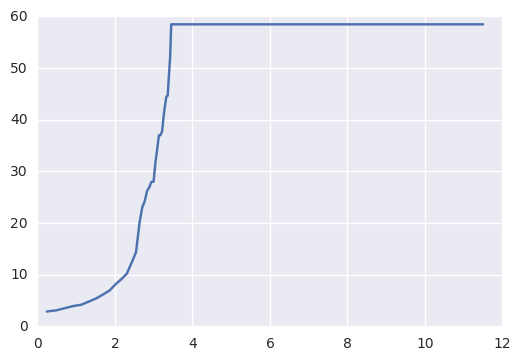

In [31]:
plt.plot(df['realtimeScaled'] , (df['maxVxsurf']/(2900.*1e3/1e-6))*(1e2*3600*24*365) )